<a href="https://colab.research.google.com/github/Eserhimas/Fundamentals/blob/main/co2_ppm_prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install prophet

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

from google.colab import drive

In [2]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
df = pd.read_csv('/content/gdrive/MyDrive/Repository/Datasets/co2_ppm/co2-ppm-daily_csv.csv')

In [4]:
df.head()

,date,value
0,1958-03-30,316.16
1,1958-03-31,316.40
2,1958-04-02,317.67
3,1958-04-03,317.76
4,1958-04-04,317.09


In [5]:
df['date'] = pd.to_datetime(df['date'])
df.columns = ['ds', 'y']

In [6]:
df.head()

,ds,y
0,1958-03-30,316.16
1,1958-03-31,316.40
2,1958-04-02,317.67
3,1958-04-03,317.76
4,1958-04-04,317.09


In [7]:
model = Prophet()
model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptao7c9i4/oy82mqmj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptao7c9i4/7stxq6xe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6710', 'data', 'file=/tmp/tmptao7c9i4/oy82mqmj.json', 'init=/tmp/tmptao7c9i4/7stxq6xe.json', 'output', 'file=/tmp/tmptao7c9i4/prophet_modeleskby7se/prophet_model-20240102073403.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:34:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:34:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [8]:
future = model.make_future_dataframe(periods=365*10)

forecast = model.predict(future)

In [16]:
forecast.tail().T

,23064,23065,23066,23067,23068
ds,2030-08-28 00:00:00,2030-08-29 00:00:00,2030-08-30 00:00:00,2030-08-31 00:00:00,2030-09-01 00:00:00
trend,437.491705,437.498192,437.504679,437.511166,437.517653
yhat_lower,424.738287,424.806422,424.646524,424.569786,424.434354
yhat_upper,444.122014,443.88025,443.632343,444.176759,443.711568
trend_lower,427.095378,427.097714,427.100051,427.102387,427.104724
trend_upper,446.324138,446.334649,446.344565,446.353952,446.36334
additive_terms,-2.324979,-2.39092,-2.450695,-2.517886,-2.567741
additive_terms_lower,-2.324979,-2.39092,-2.450695,-2.517886,-2.567741
additive_terms_upper,-2.324979,-2.39092,-2.450695,-2.517886,-2.567741
weekly,0.003485,-0.000103,0.00132,-0.005854,0.003102


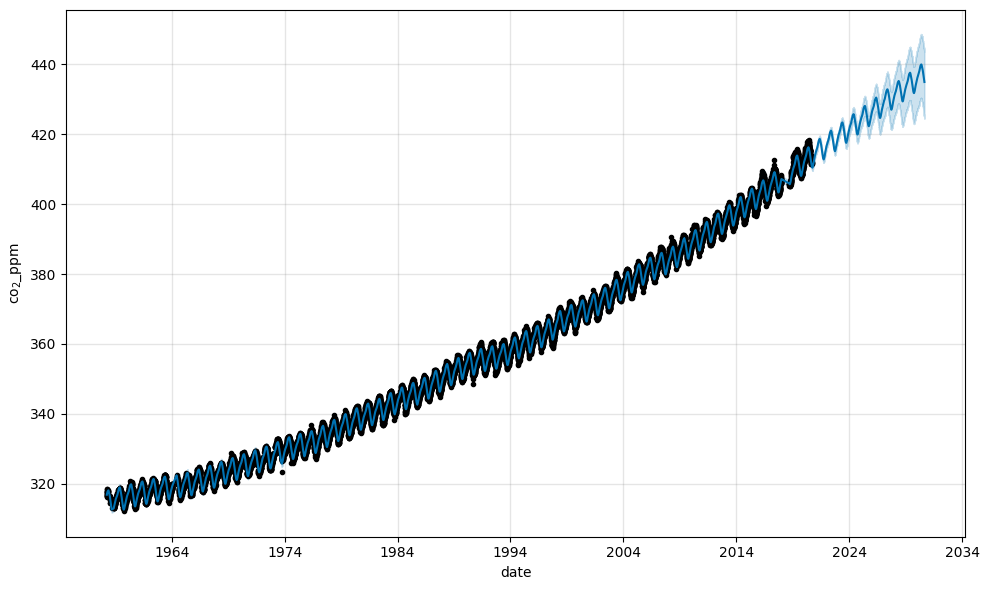

In [14]:
fig = model.plot(forecast, xlabel='date', ylabel='co$_2$_ppm')
plt.show()

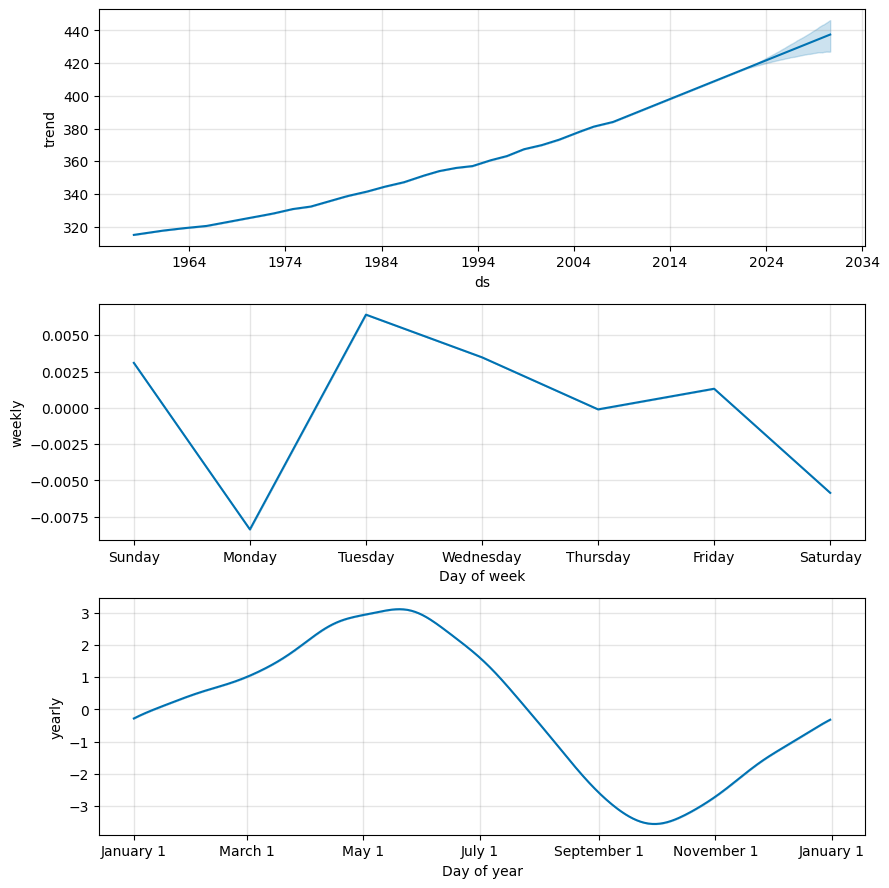

In [17]:
fig_comp = model.plot_components(forecast)
plt.show()